In [1]:
import os
os.chdir("modulo/")

In [88]:
import numpy as np 
import pandas as pd 
import metrics
import optimization
import matplotlib.pyplot as plt

In [3]:
os.chdir("..")

In [119]:
import numpy as np

def minimize_vol(rp, e_r, cov, alpha= 0.0001):
    n =  e_r.shape[0]
    
    #Primeiro Chute
    w = (np.ones(n)*1/n).reshape(n, 1)#Carteira
    l = np.array([[0.],[0.]])#Multiplicadores de Lagrange
    
    #Calculando grad(c(x)) 
    dc = np.hstack((np.ones((n,1)), e_r))

    #Criando a Matriz A
    def generate_A(Sigma, dc, n):
        a = np.hstack([2*Sigma, dc])
        b = np.hstack([dc.T, np.zeros((2,2))])
        return np.vstack((a, b))
    
    #Criando o vetor b.
    def generate_b(Sigma, dc, e_r, l, w, rp):
        a = 2*Sigma@w + dc@l
        b = np.ones((1,n))@w - 1
        c = e_r.T@w - rp
        return -1*np.vstack((a, b, c))
    
    def grad(w, cov, l, dc):
        return (2*cov@w+ dc@l - np.reciprocal(w))
    
    A = generate_A(cov, dc, n)
    
    
    while abs():
        b = generate_b(cov, dc, e_r, l, w, rp)
        dx = np.linalg.inv(A)@b
        dw, dl = dx[0:n][:], dx[n:n+2][:]
        w = w + alpha*dw
        
        l = l + alpha*dl
        
    plt.plot(v_wmin)
    plt.show
    return w

In [58]:
#dados = pd.read_csv("dados_ajustados.csv", decimal= ",", delimiter =";", index_col="Data")
#retornos = dados.pct_change().dropna()
#cov = np.array(retornos.cov())
#e_r = np.array(retornos.mean()).reshape((retornos.shape[1], 1))

In [82]:
from pandas_datareader import data as wb

dados = wb.DataReader(["^BVSP", "MGLU3.SA", "ITUB4.SA", "VALE3.SA"], 
                   data_source='yahoo', start='1-1-2018')
dados = dados["Adj Close"]
dados

Symbols,^BVSP,MGLU3.SA,ITUB4.SA,VALE3.SA
Date,,,,
2018-01-02,77891.0000,2.392650,25.197636,35.877056
2018-01-03,77995.0000,2.362478,25.369917,35.662075
2018-01-04,78647.0000,2.419202,25.898212,35.808262
2018-01-05,79071.0000,2.371529,25.972857,36.367233
2018-01-08,79379.0000,2.371830,25.886736,37.175583
...,...,...,...,...
2021-04-29,120066.0000,20.260000,27.305115,111.949997
2021-04-30,118894.0000,20.030001,27.515001,109.019997
2021-05-03,119209.0000,20.180000,27.900000,108.459999


In [83]:
retornos = dados.pct_change().dropna()
cov = np.array(retornos.cov())
e_r = np.array(retornos.mean()).reshape((retornos.shape[1], 1))

<AxesSubplot:xlabel='Vol'>

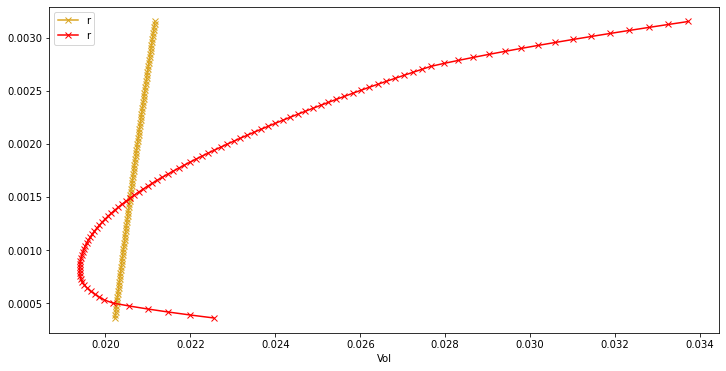

In [84]:
returns = np.linspace(min(e_r), max(e_r), 100)
carteiras_pi = np.array([minimize_vol(r, e_r, cov) for r in returns])
carteiras_scipy = np.array([minimize_vol2(r, e_r, cov).reshape((4, 1)) for r in returns])

vol1 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_pi]
dic1 = {"Vol": vol1, "r": returns.reshape(returns.shape[0])}
df1 = pd.DataFrame(dic1)
ax = df1.plot(x="Vol", y="r", marker = "x", color="goldenrod", figsize=(12,6))

vol2 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
dic2 = {"Vol": vol2, "r": returns.reshape(returns.shape[0])}
df2 = pd.DataFrame(dic2)
df2.plot(x="Vol", y="r", marker = "x", color="red", ax = ax)

In [80]:
carteiras_pi

array([[[0.  ],
        [1.  ]],

       [[0.01],
        [0.99]],

       [[0.02],
        [0.98]],

       [[0.03],
        [0.97]],

       [[0.04],
        [0.96]],

       [[0.05],
        [0.95]],

       [[0.06],
        [0.94]],

       [[0.07],
        [0.93]],

       [[0.08],
        [0.92]],

       [[0.09],
        [0.91]],

       [[0.1 ],
        [0.9 ]],

       [[0.11],
        [0.89]],

       [[0.12],
        [0.88]],

       [[0.13],
        [0.87]],

       [[0.14],
        [0.86]],

       [[0.15],
        [0.85]],

       [[0.16],
        [0.84]],

       [[0.17],
        [0.83]],

       [[0.18],
        [0.82]],

       [[0.19],
        [0.81]],

       [[0.2 ],
        [0.8 ]],

       [[0.21],
        [0.79]],

       [[0.22],
        [0.78]],

       [[0.23],
        [0.77]],

       [[0.24],
        [0.76]],

       [[0.25],
        [0.75]],

       [[0.26],
        [0.74]],

       [[0.27],
        [0.73]],

       [[0.28],
        [0.72]],

       [[0.29]

In [ ]:
carteiras

Check!  0.01


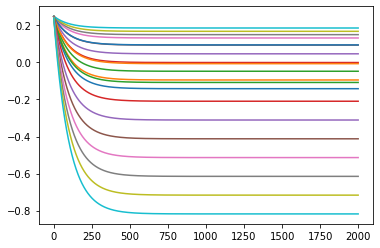

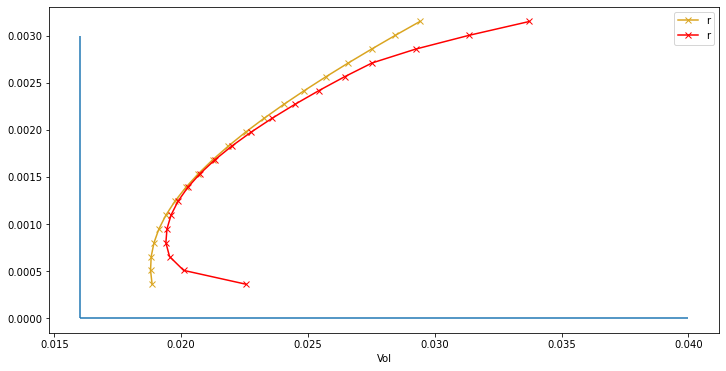

Check!  0.020000000000000004


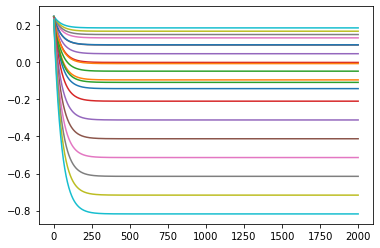

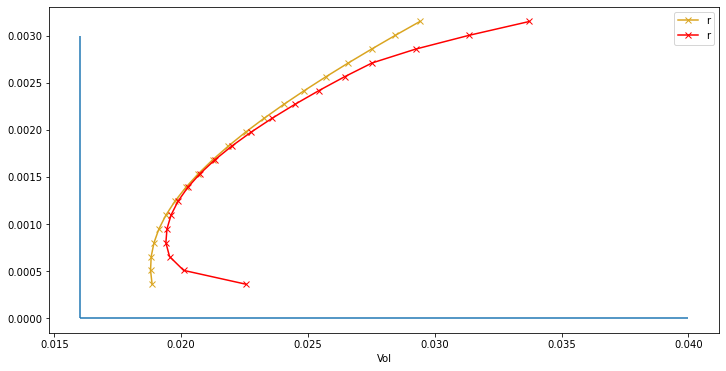

Check!  0.030000000000000006


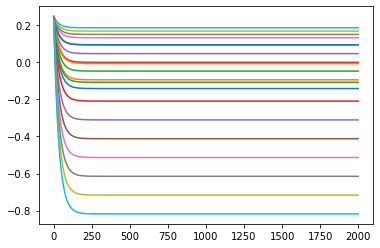

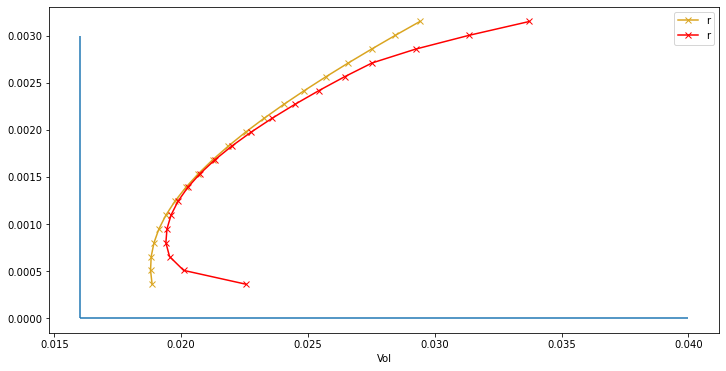

Check!  0.04000000000000001


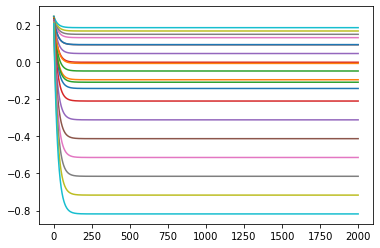

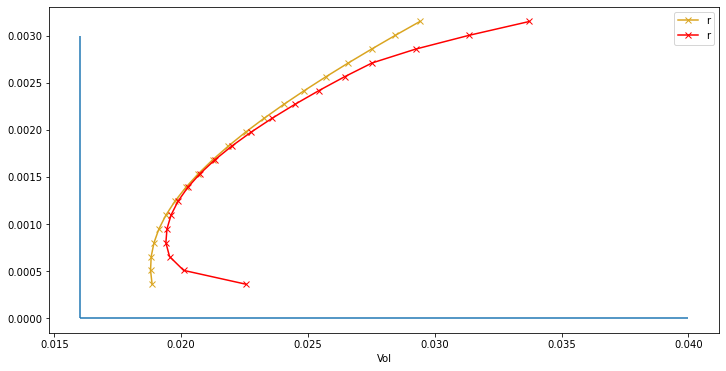

Check!  0.05000000000000001


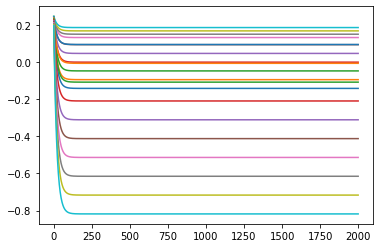

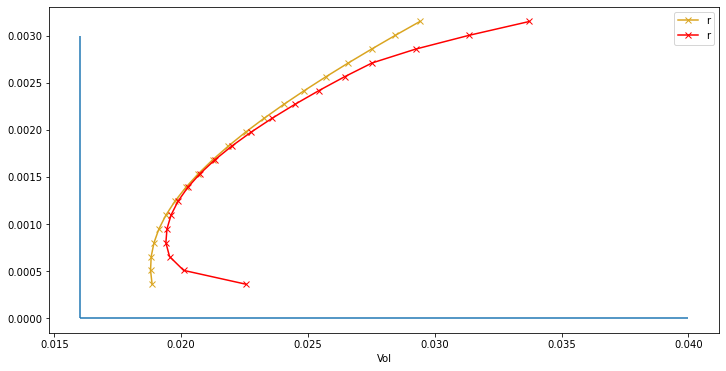

Check!  0.06000000000000001


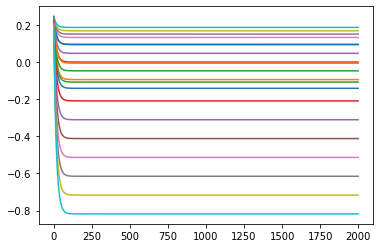

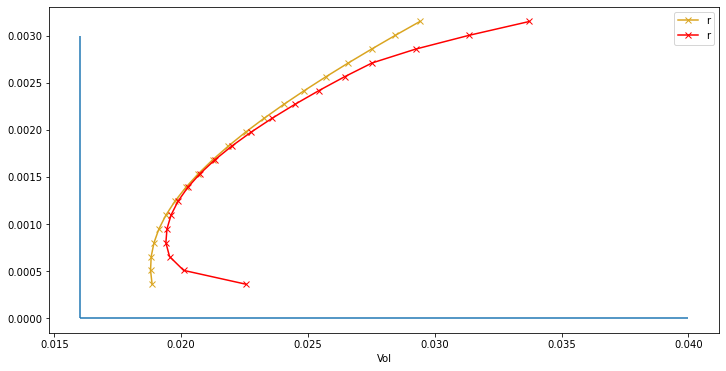

Check!  0.07


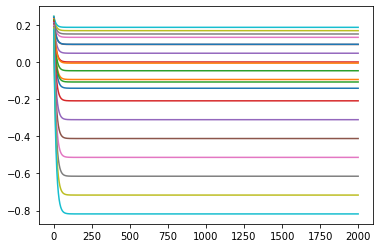

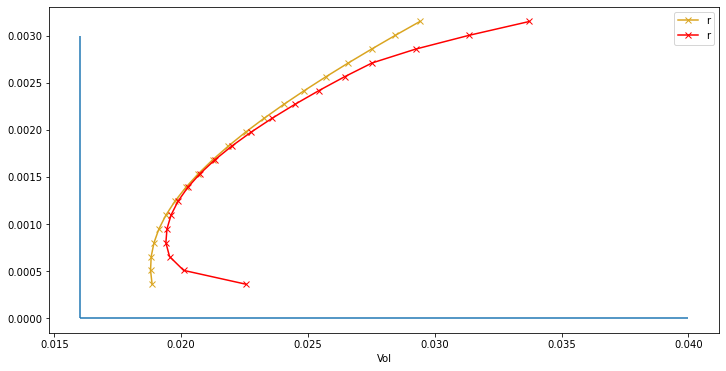

Check!  0.08


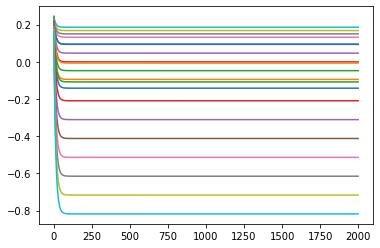

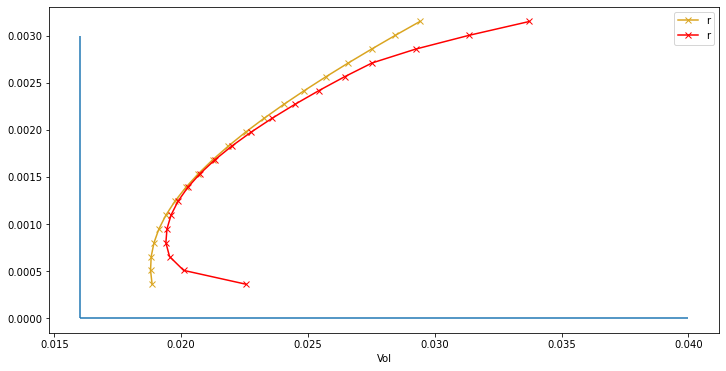

Check!  0.09000000000000001


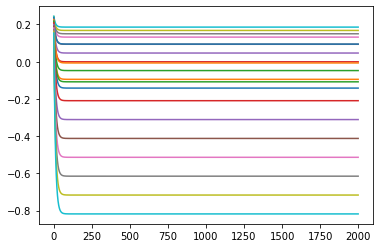

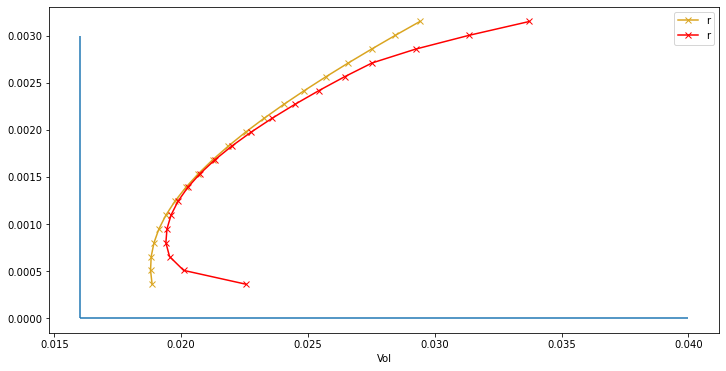

Check!  0.1


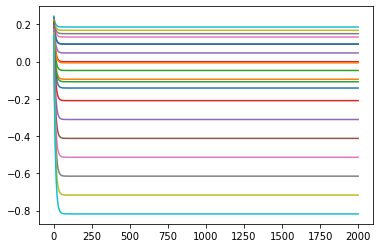

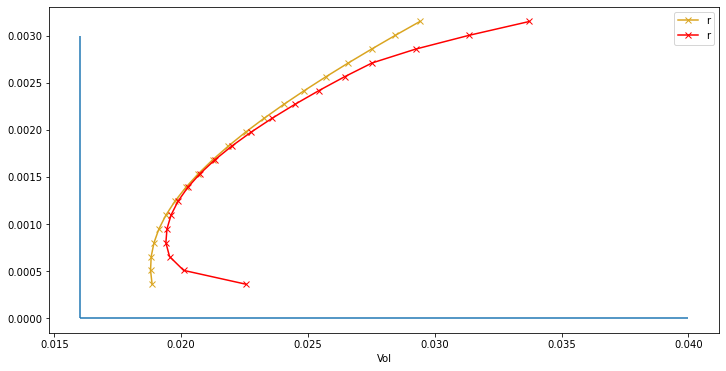

In [120]:
for alpha in np.linspace(0.01, 0.1, 10):
    returns = np.linspace(min(e_r), max(e_r), 20)
    carteiras_pi = np.array([minimize_vol(r, e_r, cov, alpha) for r in returns])
    carteiras_scipy = np.array([minimize_vol2(r, e_r, cov).reshape((4, 1)) for r in returns])
    
    print("Check! ", alpha)
    vol1 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_pi]
    dic1 = {"Vol": vol1, "r": returns.reshape(returns.shape[0])}
    df1 = pd.DataFrame(dic1)
    ax = df1.plot(x="Vol", y="r", marker = "x", color="goldenrod", figsize=(12,6))

    vol2 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
    dic2 = {"Vol": vol2, "r": returns.reshape(returns.shape[0])}
    df2 = pd.DataFrame(dic2)
    df2.plot(x="Vol", y="r", marker = "x", color="red", ax = ax)
    ax.hlines(0, 0.016 , 0.040)
    ax.vlines(0.016, 0, 0.003)
    plt.show()
    

In [60]:
from scipy.optimize import minimize

def minimize_vol2(target_return, er, cov):
    """
    target_ret -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - weights.T@er
    }
    
    results = minimize(lambda weights, cov: weights.T@cov@weights, init_guess,
                       args=(cov,), method="SLSQP",
                       options={"disp":False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x
    

<AxesSubplot:xlabel='Vol'>

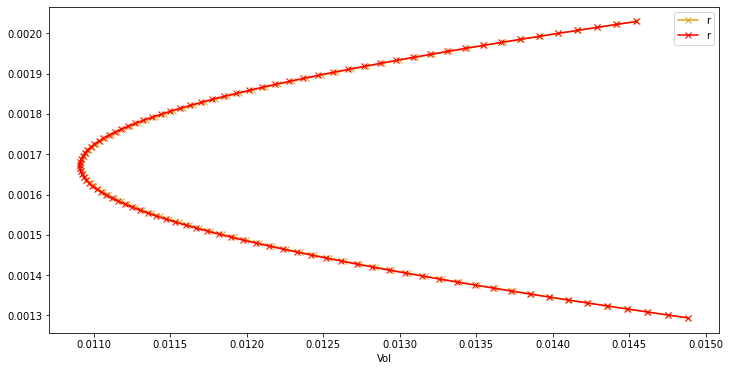

In [76]:
dados = pd.read_csv("dados_ajustados.csv", decimal= ",", delimiter =";")
dados = dados[["SPXI", "IBOV"]]
retornos = dados.pct_change().dropna()
cov = np.array(retornos.cov())
e_r = np.array(retornos.mean()).reshape(2, 1)


returns = np.linspace(min(e_r), max(e_r), 100)
carteiras_pi = np.array([np.round(minimize_vol(r, e_r, cov), 2) for r in returns])
carteiras_scipy = np.array([minimize_vol(r, e_r, cov).reshape((2, 1)) for r in returns])

vol1 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_pi]
dic1 = {"Vol": vol1, "r": returns.reshape(returns.shape[0])}
df1 = pd.DataFrame(dic1)
ax = df1.plot(x="Vol", y="r", marker = "x", color="goldenrod", figsize=(12,6))

vol2 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
dic2 = {"Vol": vol2, "r": returns.reshape(returns.shape[0])}
df2 = pd.DataFrame(dic2)
df2.plot(x="Vol", y="r", marker = "x", color="red", ax = ax)

In [109]:
np.maximum(np.array([[0],[0]]), np.array([[1], [-1]]))

array([[1],
       [0]])